In [179]:
# import librearies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import missingno as msno

import warnings
warnings.filterwarnings("ignore")


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler


In [180]:
path = r"G:\VS CODE\students_marks-24\notebook\prepare_train.csv"
df_train = pd.read_csv(path)
df_train.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [181]:
# Separate features (X) and target (y)
X = df_train.drop(columns=['math_score'])
y = df_train['math_score']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [182]:
df_train.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler

# Define transformers for numeric and categorical columns
numeric_features = ['reading_score', 'writing_score']
cat_one_features = ['gender','race_ethnicity', 'parental_level_of_education', 'lunch','test_preparation_course']
#cat_label_features = ['race_ethnicity', 'parental_level_of_education', 'lunch','test_preparation_course']

# Combine transformers for numeric and categorical features using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('one', OneHotEncoder(), cat_one_features),
        #('ord', OrdinalEncoder(), cat_label_features),
    ],
    remainder='passthrough'
)


# 1. LogisticRegression

In [184]:
from sklearn.linear_model import LinearRegression

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['reading_score',
                                                   'writing_score']),
                                                 ('one', OneHotEncoder(),
                                                  ['gender', 'race_ethnicity',
                                                   'parental_level_of_education',
                                                   'lunch',
                                                   'test_preparation_course'])])),
                ('regressor', LinearRegression())])

In [185]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on both the training and test sets
train_predictions = lr_pipeline.predict(X_train)
test_predictions = lr_pipeline.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Evaluate Mean Squared Errors
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Evaluate Root Mean Squared Errors
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)


# Print the results
print(f'Training Set R-squared score for LR: {train_r2}')
print(f'Test Set R-squared score for LR: {test_r2}')
print(f'Training Set Mean Squared Error for LR: {train_mse}')
print(f'Test Set Mean Squared Error for LR: {test_mse}')

print(f'Training Set Root Mean Squared Error for LR: {train_rmse}')
print(f'Test Set Root Mean Squared Error for LR: {test_rmse}')

Training Set R-squared score for LR: 0.8709936797851189
Test Set R-squared score for LR: 0.9095636876168753
Training Set Mean Squared Error for LR: 28.555973267017098
Test Set Mean Squared Error for LR: 27.097206188574695
Training Set Root Mean Squared Error for LR: 5.343778931338487
Test Set Root Mean Squared Error for LR: 5.20549768884539


In [186]:
from sklearn.model_selection import cross_val_score, KFold

# Use KFold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cross_val_results = cross_val_score(lr_pipeline, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores for LR:", cross_val_results)

# Print the mean and standard deviation of R-squared scores
print("Mean R-squared for LR:", cross_val_results.mean())
print("Standard Deviation of R-squared for LR:", cross_val_results.std())

Cross-Validation R-squared scores for LR: [0.85413468 0.86502233 0.89592117 0.83403776 0.87088516]
Mean R-squared for LR: 0.8640002189885154
Standard Deviation of R-squared for LR: 0.020309957994855642


# Lasso

In [187]:
from sklearn.linear_model import Lasso
# Lasso Regression Pipeline
la_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Fit the pipeline
la_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['reading_score',
                                                   'writing_score']),
                                                 ('one', OneHotEncoder(),
                                                  ['gender', 'race_ethnicity',
                                                   'parental_level_of_education',
                                                   'lunch',
                                                   'test_preparation_course'])])),
                ('regressor', Lasso())])

In [188]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on both the training and test sets
train_predictions = la_pipeline.predict(X_train)
test_predictions = la_pipeline.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Evaluate Mean Squared Errors
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Evaluate Root Mean Squared Errors
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Print the results
print(f'Training Set R-squared score for La: {train_r2}')
print(f'Test Set R-squared score for La: {test_r2}')
print(f'Training Set Mean Squared Error for La: {train_mse}')
print(f'Test Set Mean Squared Error for La: {test_mse}')
print(f'Training Set Root Mean Squared Error for La: {train_rmse}')
print(f'Test Set Root Mean Squared Error for La: {test_rmse}')

Training Set R-squared score for La: 0.8021450494729873
Test Set R-squared score for La: 0.8623027707490616
Training Set Mean Squared Error for La: 43.795844022102685
Test Set Mean Squared Error for La: 41.25787655738555
Training Set Root Mean Squared Error for La: 6.617842852629751
Test Set Root Mean Squared Error for La: 6.423229449224553


In [189]:
from sklearn.model_selection import cross_val_score, KFold

# Use KFold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cross_val_results = cross_val_score(la_pipeline, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores for La:", cross_val_results)

# Print the mean and standard deviation of R-squared scores
print("Mean R-squared for La:", cross_val_results.mean())
print("Standard Deviation of R-squared for La:", cross_val_results.std())

Cross-Validation R-squared scores for La: [0.78030258 0.79061097 0.82768707 0.77297176 0.808264  ]
Mean R-squared for La: 0.7959672767949345
Standard Deviation of R-squared for La: 0.019800106059601693


# Ridge

In [190]:
from sklearn.linear_model import Ridge

# Ridge Regression Pipeline
ri_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Fit the pipeline
ri_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['reading_score',
                                                   'writing_score']),
                                                 ('one', OneHotEncoder(),
                                                  ['gender', 'race_ethnicity',
                                                   'parental_level_of_education',
                                                   'lunch',
                                                   'test_preparation_course'])])),
                ('regressor', Ridge())])

In [191]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on both the training and test sets
train_predictions = ri_pipeline.predict(X_train)
test_predictions = ri_pipeline.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Evaluate Mean Squared Errors
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Evaluate Root Mean Squared Errors
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Print the results
print(f'Training Set R-squared score for Ri: {train_r2}')
print(f'Test Set R-squared score for La: {test_r2}')
print(f'Training Set Mean Squared Error for Ri: {train_mse}')
print(f'Test Set Mean Squared Error for Ri: {test_mse}')
print(f'Training Set Root Mean Squared Error for Ri: {train_rmse}')
print(f'Test Set Root Mean Squared Error for Ri: {test_rmse}')

Training Set R-squared score for Ri: 0.8709838566011351
Test Set R-squared score for La: 0.9096713641350642
Training Set Mean Squared Error for Ri: 28.558147661099266
Test Set Mean Squared Error for Ri: 27.06494334262105
Training Set Root Mean Squared Error for Ri: 5.343982378442061
Test Set Root Mean Squared Error for Ri: 5.202397845476742


In [192]:
from sklearn.model_selection import cross_val_score, KFold

# Use KFold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cross_val_results = cross_val_score(ri_pipeline, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores for Ri:", cross_val_results)

# Print the mean and standard deviation of R-squared scores
print("Mean R-squared for Ri:", cross_val_results.mean())
print("Standard Deviation of R-squared for Ri:", cross_val_results.std())

Cross-Validation R-squared scores for Ri: [0.85473216 0.86483969 0.89573275 0.83403912 0.87097812]
Mean R-squared for Ri: 0.8640643676887528
Standard Deviation of R-squared for Ri: 0.02019847990539472


#  RandomForestRegressor

In [193]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['reading_score',
                                                   'writing_score']),
                                                 ('one', OneHotEncoder(),
                                                  ['gender', 'race_ethnicity',
                                                   'parental_level_of_education',
                                                   'lunch',
                                                   'test_preparation_course'])])),
                ('regressor', RandomForestRegressor())])

In [194]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on both the training and test sets
train_predictions = rf_pipeline.predict(X_train)
test_predictions = rf_pipeline.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Evaluate Mean Squared Errors
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Evaluate Root Mean Squared Errors
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Print the results
print(f'Training Set R-squared score for RF: {train_r2}')
print(f'Test Set R-squared score for RF: {test_r2}')
print(f'Training Set Mean Squared Error for RF: {train_mse}')
print(f'Test Set Mean Squared Error for RF: {test_mse}')
print(f'Training Set Root Mean Squared Error for RF: {train_rmse}')
print(f'Test Set Root Mean Squared Error for RF: {test_rmse}')

Training Set R-squared score for RF: 0.9767793393383497
Test Set R-squared score for RF: 0.8745302934106145
Training Set Mean Squared Error for RF: 5.139969607629126
Test Set Mean Squared Error for RF: 37.59417451111112
Training Set Root Mean Squared Error for RF: 2.267150106990961
Test Set Root Mean Squared Error for RF: 6.131408852059298


In [195]:
from sklearn.model_selection import cross_val_score, KFold

# Use KFold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cross_val_results = cross_val_score(rf_pipeline, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores for RF:", cross_val_results)

# Print the mean and standard deviation of R-squared scores
print("Mean R-squared for RF:", cross_val_results.mean())
print("Standard Deviation of R-squared for RF:", cross_val_results.std())

Cross-Validation R-squared scores for RF: [0.83868709 0.8122738  0.85075178 0.79484413 0.84367778]
Mean R-squared for RF: 0.8280469200459647
Standard Deviation of R-squared for RF: 0.02109153543354793


# GradientBoostingRegressor

In [196]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a pipeline with the preprocessor and a GradientBoostingRegressor
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(max_depth=3, n_estimators=100))
])

# Fit the pipeline on the training data
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['reading_score',
                                                   'writing_score']),
                                                 ('one', OneHotEncoder(),
                                                  ['gender', 'race_ethnicity',
                                                   'parental_level_of_education',
                                                   'lunch',
                                                   'test_preparation_course'])])),
                ('regressor', GradientBoostingRegressor())])

In [197]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on both the training and test sets
train_predictions = gb_pipeline.predict(X_train)
test_predictions = gb_pipeline.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Evaluate Mean Squared Errors
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Evaluate Root Mean Squared Errors
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Print the results
print(f'Training Set R-squared score for GB: {train_r2}')
print(f'Test Set R-squared score for GB: {test_r2}')
print(f'Training Set Mean Squared Error for GB: {train_mse}')
print(f'Test Set Mean Squared Error for GB: {test_mse}')
print(f'Training Set Root Mean Squared Error for GB: {train_rmse}')
print(f'Test Set Root Mean Squared Error for GB: {test_rmse}')

Training Set R-squared score for GB: 0.9026844466163215
Test Set R-squared score for GB: 0.885562067069941
Training Set Mean Squared Error for GB: 21.54111780151946
Test Set Mean Squared Error for GB: 34.28875174900124
Training Set Root Mean Squared Error for GB: 4.641240976454407
Test Set Root Mean Squared Error for GB: 5.855659804753111


In [198]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    # Exclude min_child_weight for GradientBoostingRegressor
    # 'regressor__min_child_weight': [1, 2, 3],
}


# Create the GridSearchCV object
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

Best Hyperparameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}


In [199]:
from sklearn.model_selection import cross_val_score, KFold

# Use KFold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cross_val_results = cross_val_score(gb_pipeline, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores for GB:", cross_val_results)

# Print the mean and standard deviation of R-squared scores
print("Mean R-squared for GB:", cross_val_results.mean())
print("Standard Deviation of R-squared for GB:", cross_val_results.std())

Cross-Validation R-squared scores for GB: [0.85426903 0.84328654 0.87914231 0.80941034 0.86122049]
Mean R-squared for GB: 0.8494657420442312
Standard Deviation of R-squared for GB: 0.02317136964831688


#  XGBRegressor

In [200]:
from xgboost import XGBRegressor

# Create a pipeline with the preprocessor and an XGBRegressor
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', XGBRegressor(regressor__learning_rate= 0.1, max_depth=3, min_child_weight=1, n_estimators= 100))])

# Fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['reading_score',
                                                   'writing_score']),
                                                 ('one', OneHotEncoder(),
                                                  ['gender', 'race_ethnicity',
                                                   'parental_level_of_education',
                                                   'lunch',
                                                   'test_preparation_course'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_byle...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

In [201]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on both the training and test sets
train_predictions = xgb_pipeline.predict(X_train)
test_predictions = xgb_pipeline.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Evaluate Mean Squared Errors
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Evaluate Root Mean Squared Errors
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

# Print the results
print(f'Training Set R-squared score for XGB: {train_r2}')
print(f'Test Set R-squared score for XGB: {test_r2}')
print(f'Training Set Mean Squared Error for XGB: {train_mse}')
print(f'Test Set Mean Squared Error for XGB: {test_mse}')
print(f'Training Set Root Mean Squared Error for XGB: {train_rmse}')
print(f'Test Set Root Mean Squared Error for XGB: {test_rmse}')

Training Set R-squared score for XGB: 0.9267606922247131
Test Set R-squared score for XGB: 0.875610732234642
Training Set Mean Squared Error for XGB: 16.211761652005322
Test Set Mean Squared Error for XGB: 37.270445327364804
Training Set Root Mean Squared Error for XGB: 4.0263831973627795
Test Set Root Mean Squared Error for XGB: 6.104952524579106


In [202]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_child_weight': [1, 2, 3],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
test_predictions = best_model.predict(X_test)

Best Hyperparameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 100}


In [203]:
from sklearn.model_selection import cross_val_score, KFold

# Use KFold cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cross_val_results = cross_val_score(xgb_pipeline, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores for XGB:", cross_val_results)

# Print the mean and standard deviation of R-squared scores
print("Mean R-squared for XGB:", cross_val_results.mean())
print("Standard Deviation of R-squared for XGB:", cross_val_results.std())

Cross-Validation R-squared scores for XGB: [0.85334498 0.8389781  0.86637258 0.78604025 0.85086132]
Mean R-squared for XGB: 0.8391194444572225
Standard Deviation of R-squared for XGB: 0.027929884068247403


# Make prediction

In [204]:
# Assuming 'new_data' is your new input data (similar structure as your original DataFrame)
new_data = pd.DataFrame({
    'gender': ['female'],
    'race_ethnicity': ['group A'],  # Allow the user to input the race-ethnicity value
    'parental_level_of_education': ["bachelor's degree"],
    'lunch': ['standard'],  # Allow the user to input the lunch value
    'test_preparation_course': ['none'],
    'reading_score': [90],
    'writing_score': [90]
})

# Use the preprocessor and the trained model to make predictions on the new data
new_data_processed = lr_pipeline.named_steps['preprocessor'].transform(new_data)
predictions = gb_pipeline.named_steps['regressor'].predict(new_data_processed)

print('Predicted Values:', predictions)

Predicted Values: [81.23069514]


In [205]:
# Assuming lr_pipeline has already been trained
# Use the trained model to make predictions on the test data
y_pred = lr_pipeline.predict(X_test)

# Create a DataFrame to compare actual vs predicted values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})

# Display the DataFrame
print(pred_df)

     Actual Value  Predicted Value  Difference
521            91        76.399729   14.600271
737            53        58.874529   -5.874529
740            80        76.906003    3.093997
660            74        77.092163   -3.092163
411            84        87.420816   -3.420816
..            ...              ...         ...
436            75        70.951357    4.048643
764            60        67.074030   -7.074030
88             58        61.498465   -3.498465
63             69        65.697901    3.302099
826            56        55.302477    0.697523

[100 rows x 3 columns]


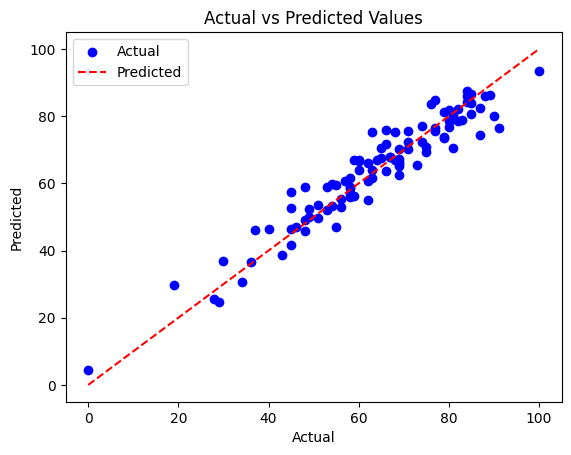

In [206]:
# Fit the pipeline on the training data
lr_pipeline.fit(X_train, y_train)

# Predict values using the trained pipeline
y_pred = lr_pipeline.predict(X_test)

# Scatter plot with different colors for actual and predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Predicted')

# Customize plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [207]:
with open("LinearRegressionModel.pkl", "wb") as model_file:
    joblib.dump(lr_pipeline, model_file)